In [219]:
# Import all lib

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="dark", color_codes=True, font_scale=1.5)
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("DataCoSupplyChainDataset.csv")

In [3]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Order Country
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class,Indonesia
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,India
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,India
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,Australia
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,China
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,Japan
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,Australia
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,Australia


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
tt = df.isna().any()
                                               #List of columns having NaN value
df.isna().sum()[tt]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [6]:
df = df.drop(["Product Description", "Order Zipcode"] , axis = 1)

In [7]:
df = df.dropna()

In [8]:
tt = df.isna().any()
                                               #List of columns having NaN value
df.isna().sum()[tt]

Series([], dtype: int64)

In [9]:
df.duplicated().sum()

0

# Data Understanding and Preprocessing

### Type

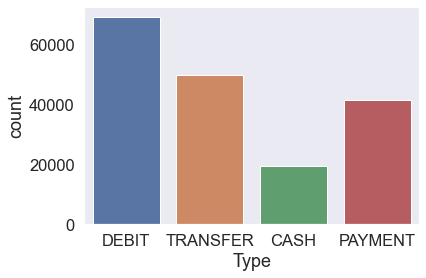

In [10]:
ax = sns.countplot(x="Type", data=df)
plt.show()

#### 1   Days for shipping (real)       
#### 2   Days for shipment (scheduled)

In [11]:
df["Delay"] = df["Days for shipment (scheduled)"] - df["Days for shipping (real)"]

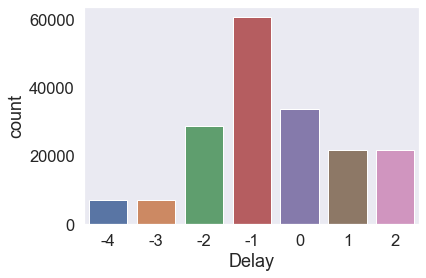

In [12]:
ax = sns.countplot(x="Delay", data=df)
plt.show()

### Benefit per order

<function matplotlib.pyplot.show(close=None, block=None)>

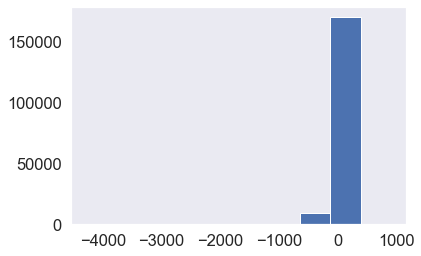

In [13]:
plt.hist(df["Benefit per order"],bins=10)
plt.show

In [14]:
Q1 = df["Benefit per order"].quantile(0.25)
Q3 = df["Benefit per order"].quantile(0.75)



IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR

ls = df.index[(df["Benefit per order"]< lower) ]

ls2 = df.index[(df["Benefit per order"] > upper)]
ind_lis = []
ind_lis.extend(ls)
ind_lis.extend(ls2)


''' Removing the Outliers '''
df = df.drop(ind_lis)
print("new Shape: ", df.shape)

Old Shape:  (180508, 52)
new Shape:  (161570, 52)


<function matplotlib.pyplot.show(close=None, block=None)>

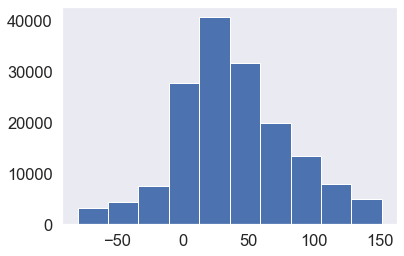

In [15]:
plt.hist(df["Benefit per order"],bins=10)
plt.show

### Sales per customer

<function matplotlib.pyplot.show(close=None, block=None)>

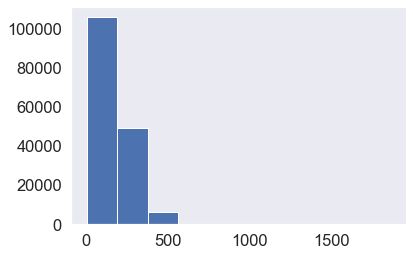

In [16]:
plt.hist(df["Sales per customer"],bins=10)
plt.show

In [17]:
Q1 = df["Sales per customer"].quantile(0.25)
Q3 = df["Sales per customer"].quantile(0.75)



IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR

ls = df.index[(df["Sales per customer"]< lower) ]

ls2 = df.index[(df["Sales per customer"] > upper)]
ind_lis = []
ind_lis.extend(ls)
ind_lis.extend(ls2)


''' Removing the Outliers '''
df = df.drop(ind_lis)
print("new Shape: ", df.shape)

Old Shape:  (161570, 52)
new Shape:  (160363, 52)


<function matplotlib.pyplot.show(close=None, block=None)>

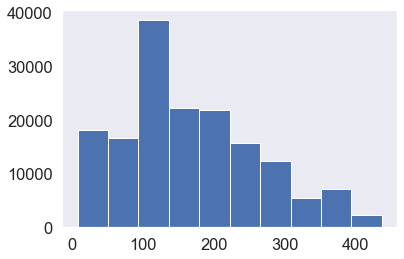

In [18]:
plt.hist(df["Sales per customer"],bins=10)
plt.show

### Delivery Status

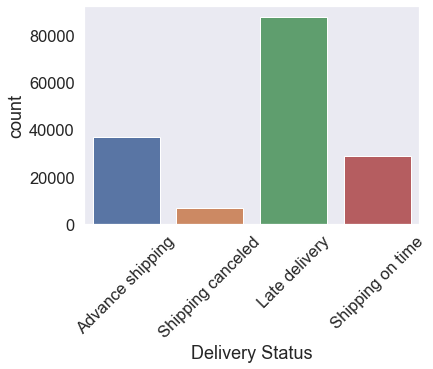

In [19]:
ax = sns.countplot(x="Delivery Status", data=df)
plt.xticks(rotation=45)
plt.show()

### Late_delivery_risk

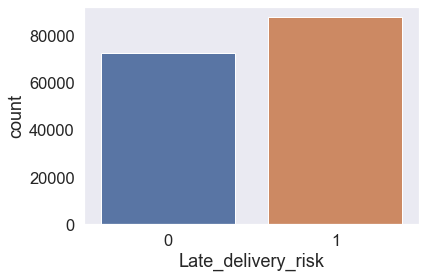

In [20]:
ax = sns.countplot(x="Late_delivery_risk", data=df)
plt.show()

In [21]:
for col in df:
    if df[col].dtype== object:
        print(col, len(df[col].unique()))

Type 4
Delivery Status 4
Category Name 49
Customer City 562
Customer Country 2
Customer Email 1
Customer Fname 772
Customer Lname 1101
Customer Password 1
Customer Segment 3
Customer State 44
Customer Street 6946
Department Name 11
Market 5
Order City 3587
order date (DateOrders) 62375
Order Region 23
Order State 1086
Order Status 9
Product Image 113
Product Name 113
shipping date (DateOrders) 60535
Shipping Mode 4
Order Country 164


### Category Name

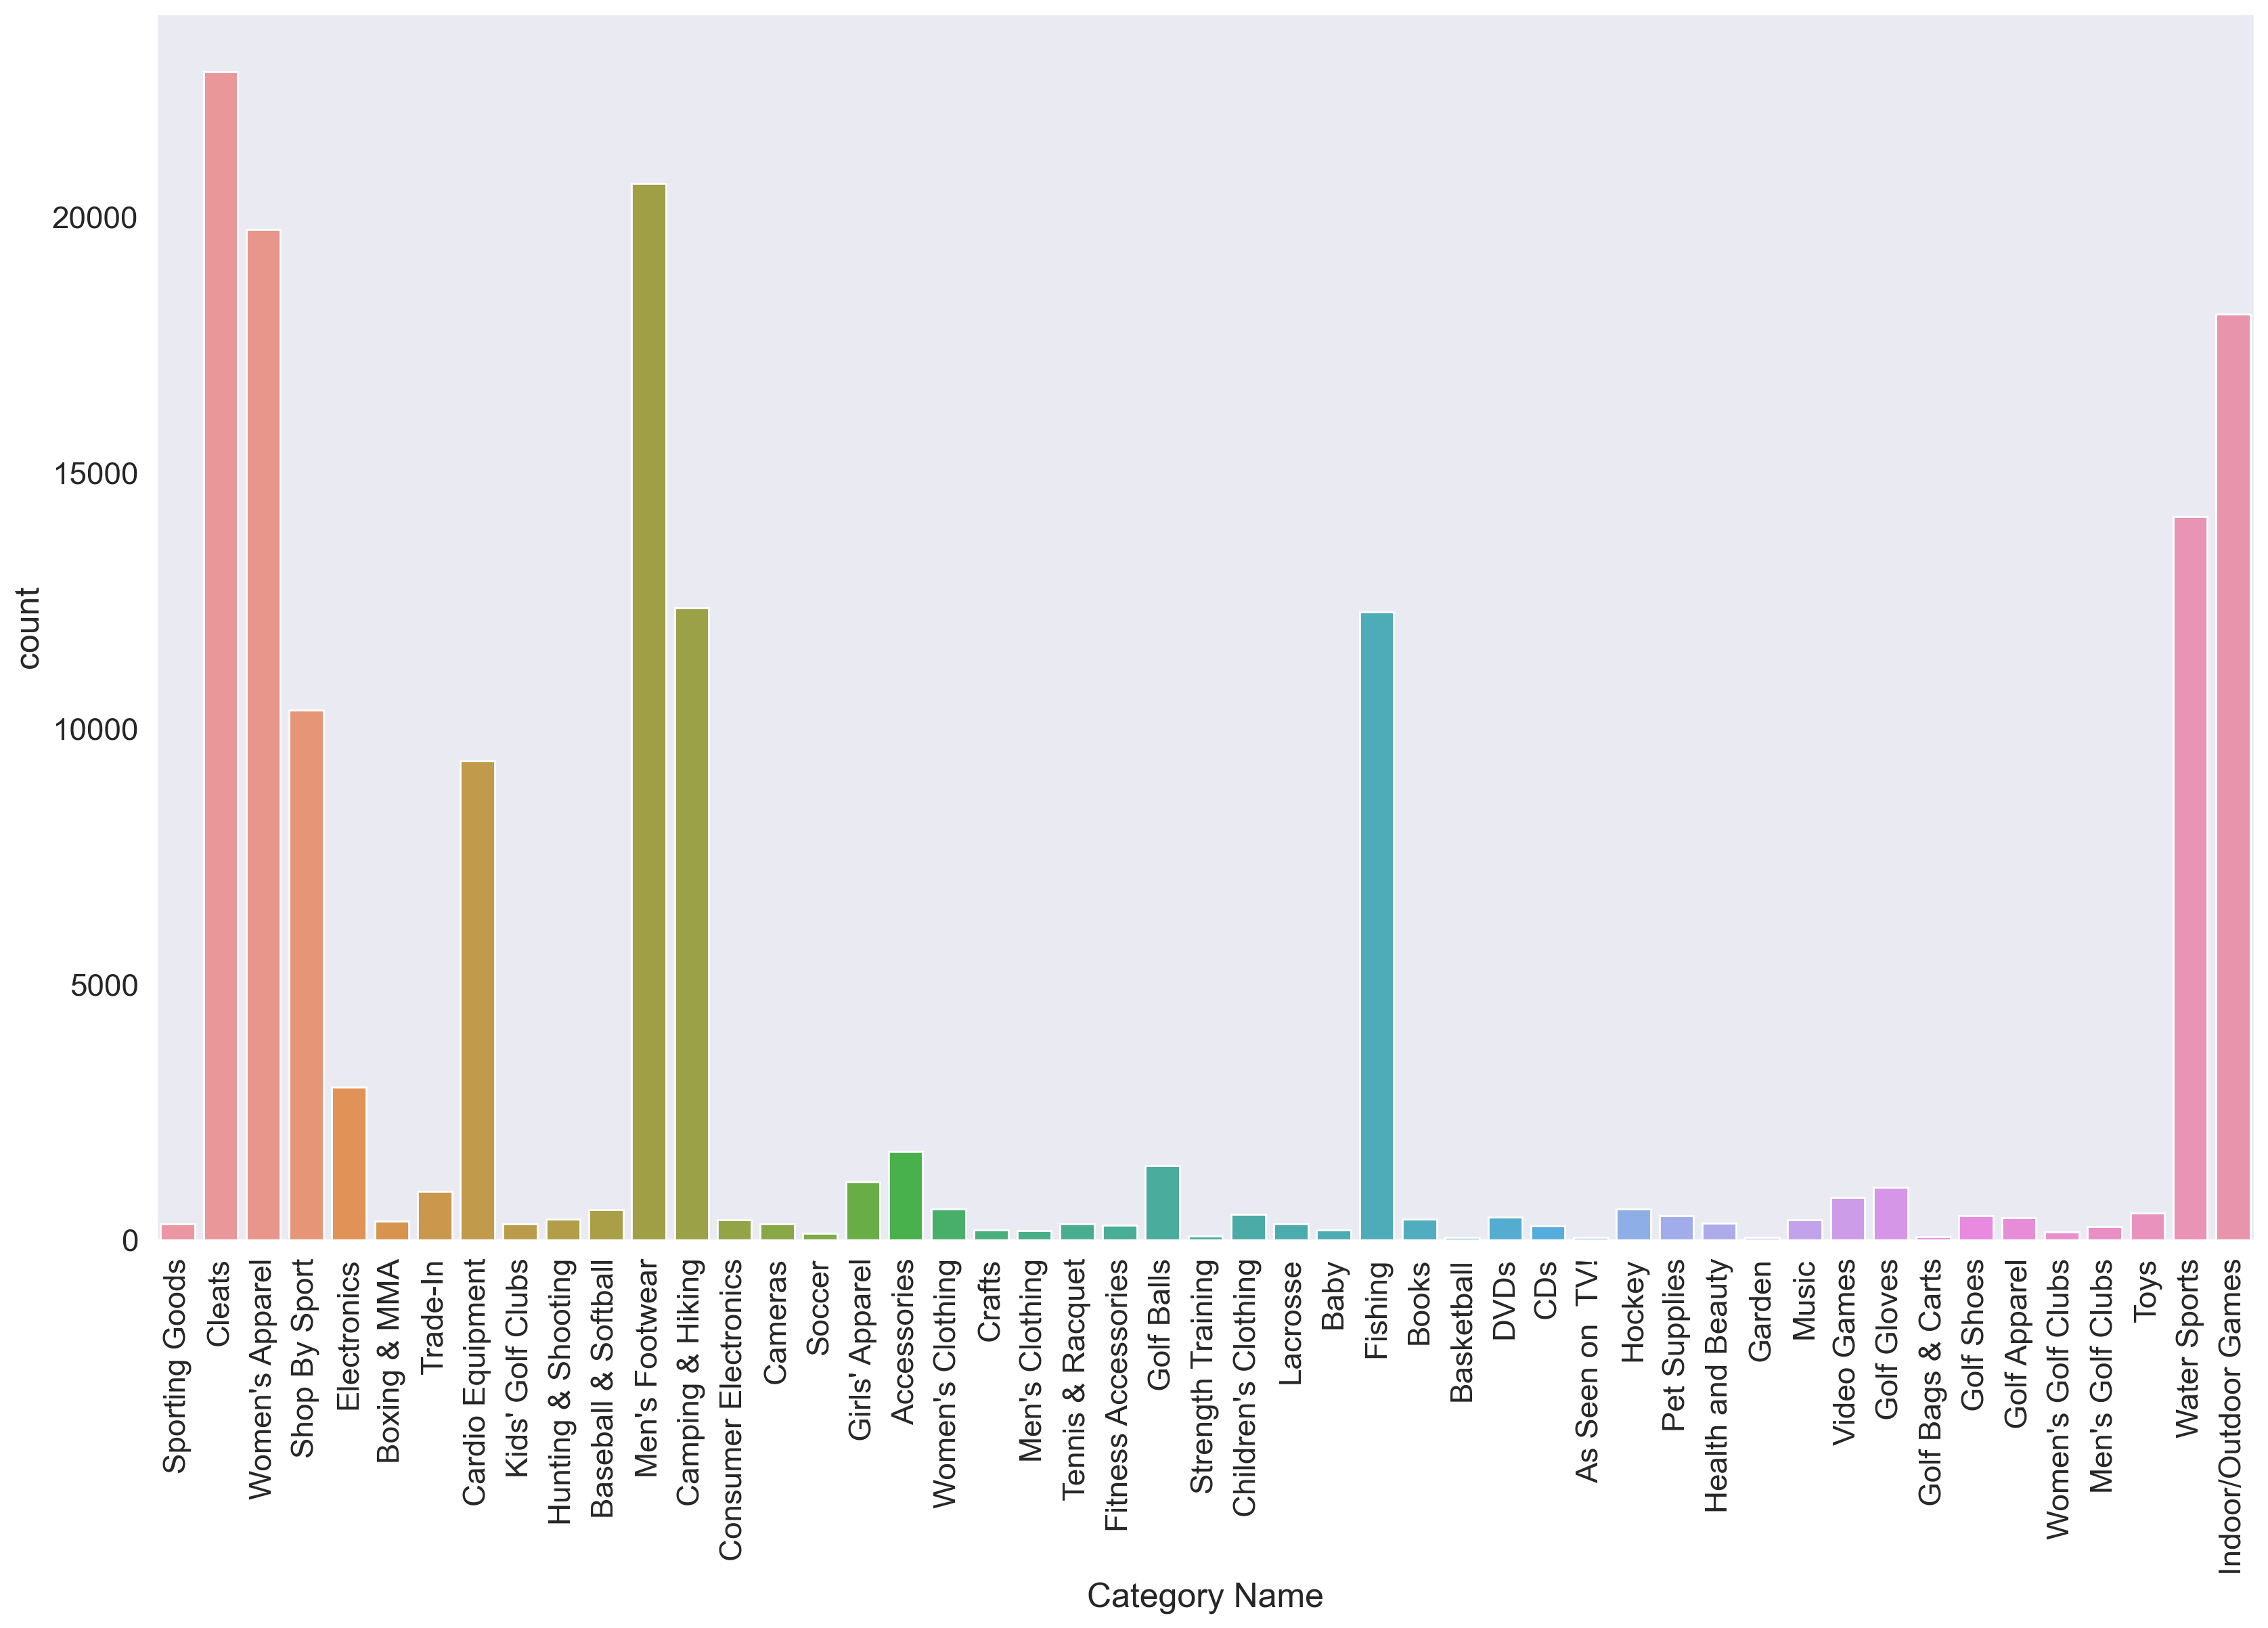

In [22]:
plt.figure(figsize=(20,12), dpi= 200)
ax = sns.countplot(x="Category Name", data=df)
plt.xticks(rotation=90)
plt.show()

### Customer Country

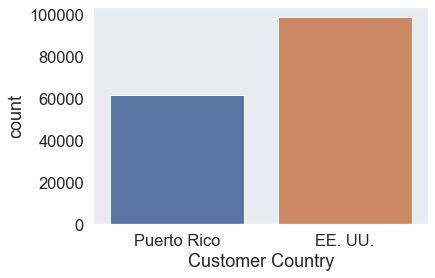

In [23]:
ax = sns.countplot(x="Customer Country", data=df)
plt.show()

### Customer Email 
### Customer Fname  
### Customer Lname
### Customer Password

In [24]:
  # Droping irrelevant
df = df.drop(["Customer Email", "Customer Fname", "Customer Lname", "Customer Password"], axis = 1) 

### Customer Segment

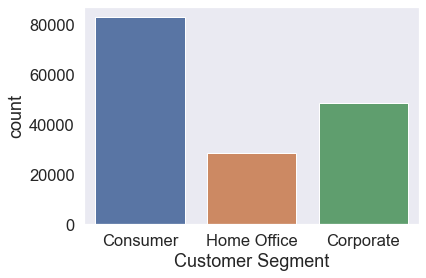

In [25]:
ax = sns.countplot(x="Customer Segment", data=df)
plt.show()

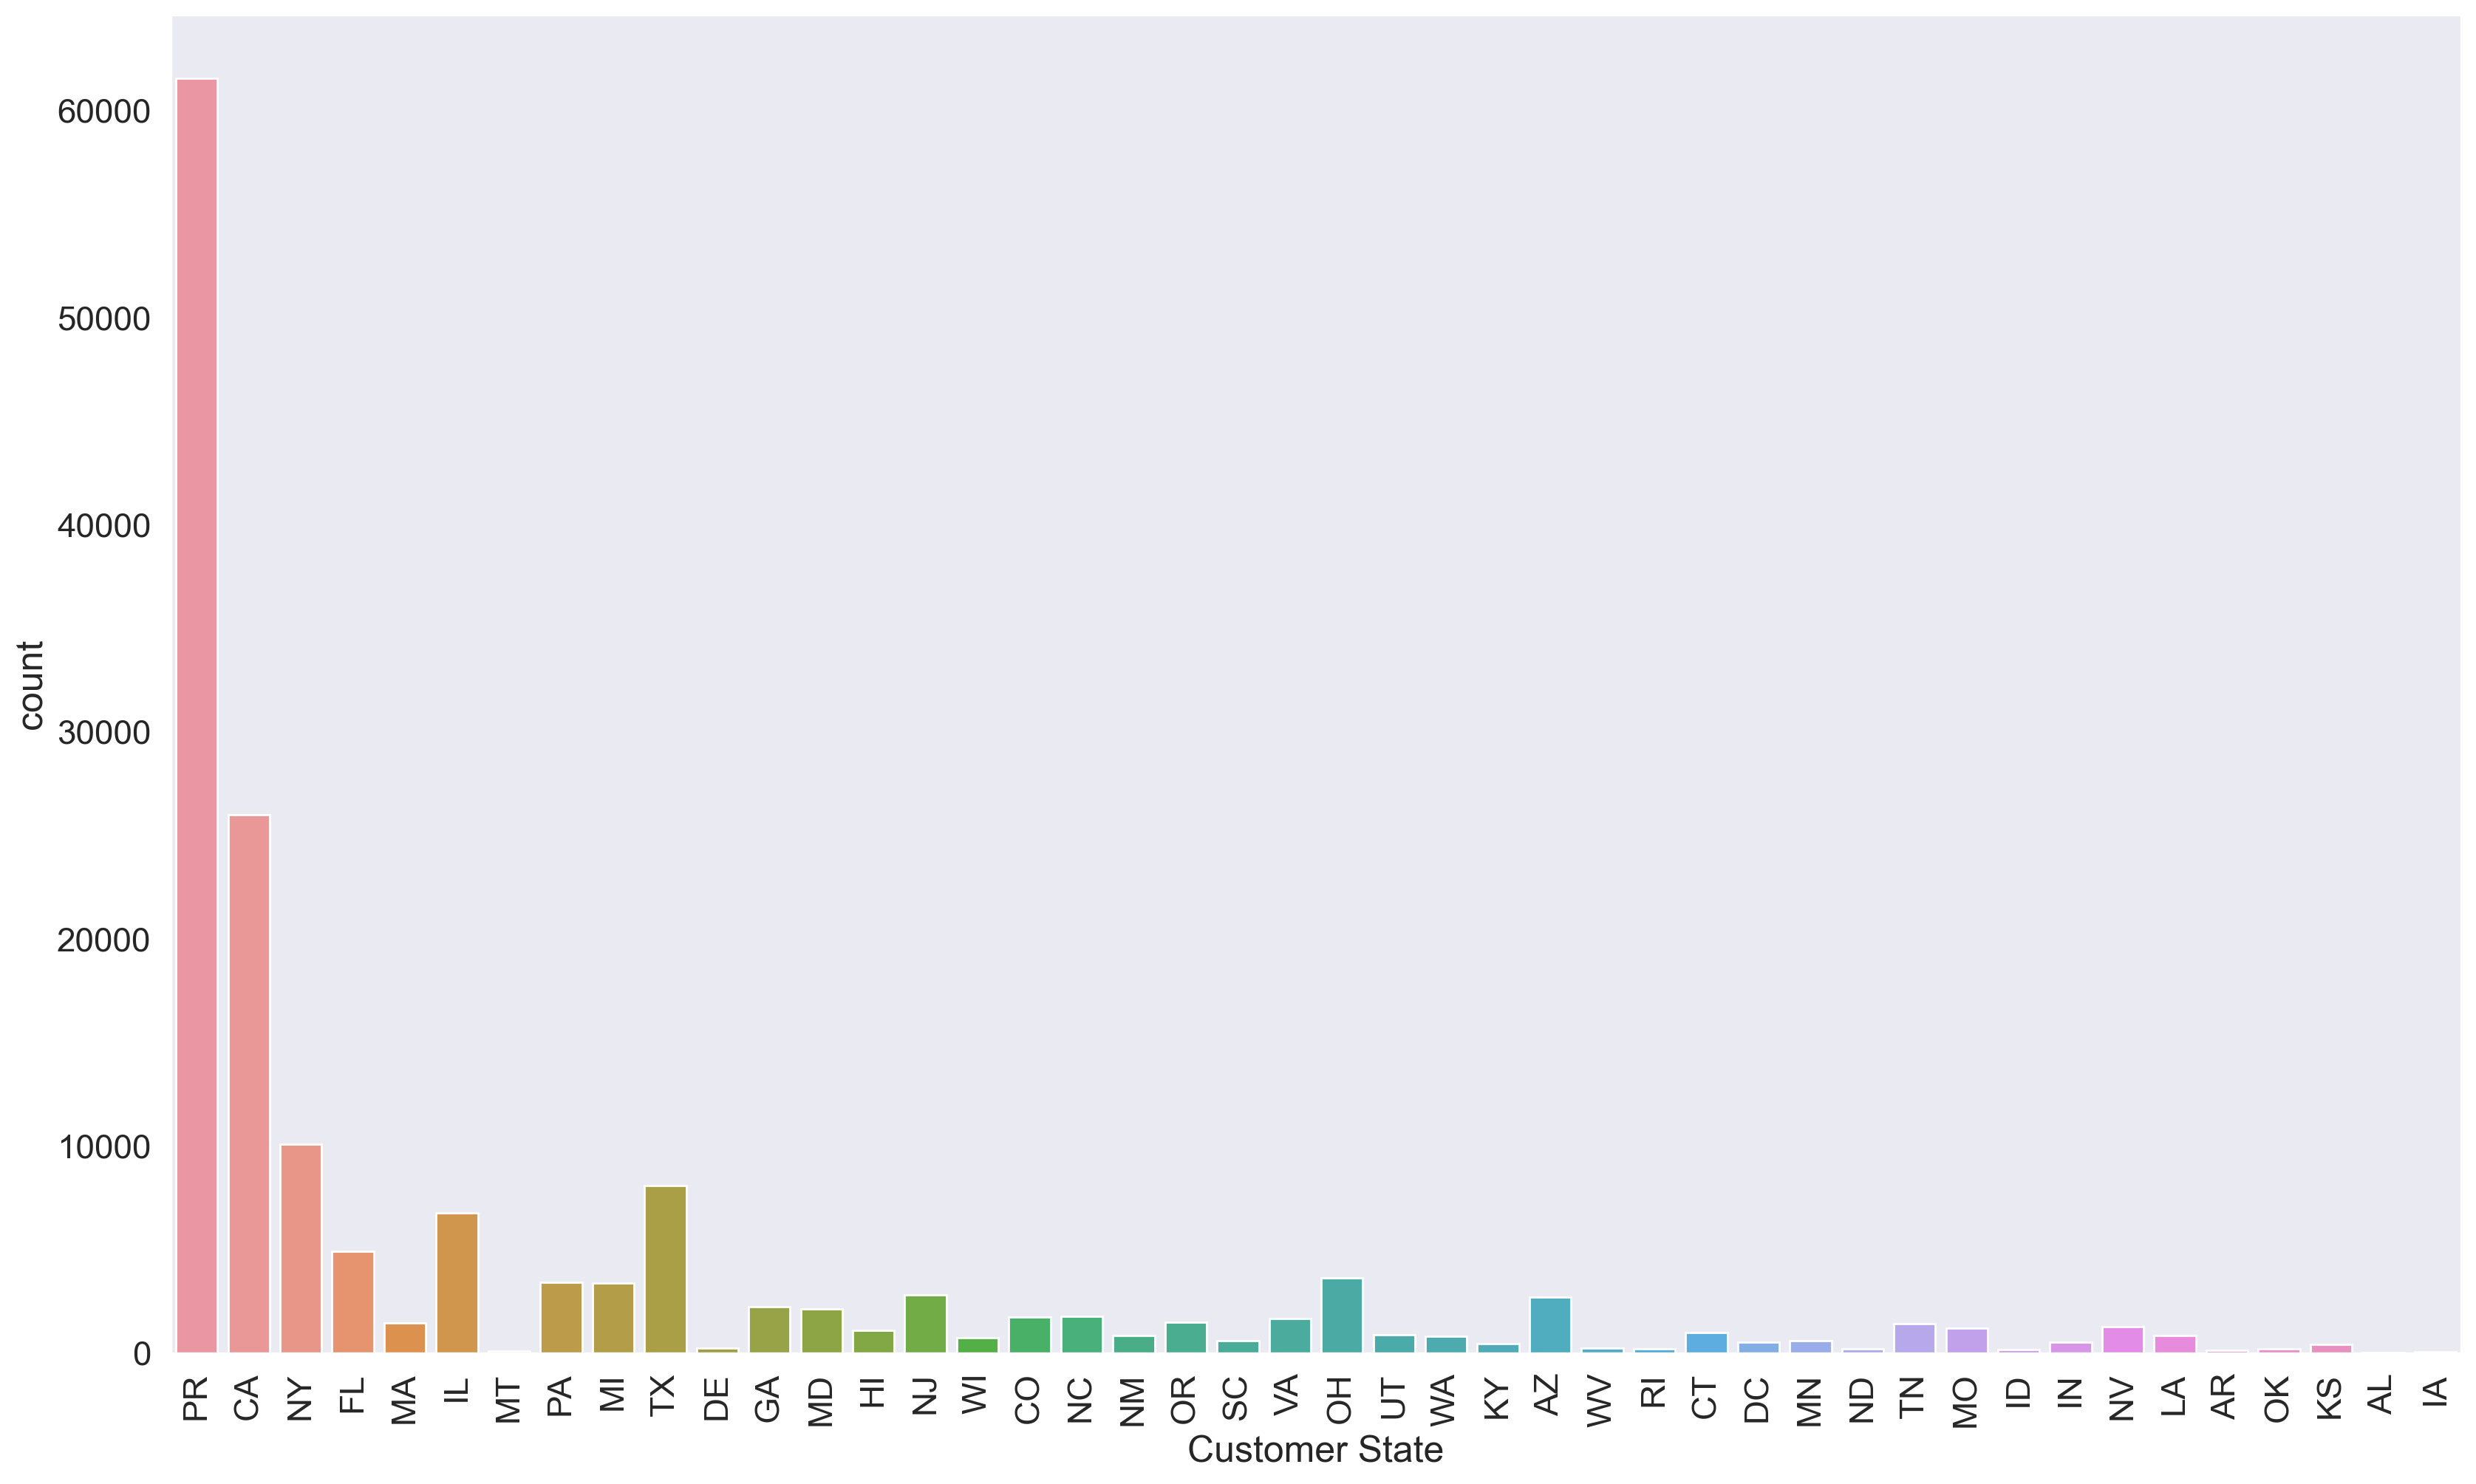

In [26]:
plt.figure(figsize=(20,12), dpi= 200)
ax = sns.countplot(x="Customer State", data=df)
plt.xticks(rotation=90)
plt.show()

### Customer Street

In [27]:
df = df.drop("Customer Street", axis = 1)

### Customer Zipcode

In [28]:
df = df.drop("Customer Zipcode", axis = 1)

### Department Id
### Department Name

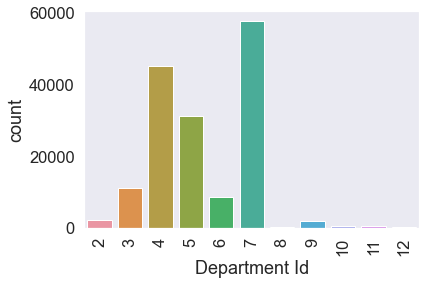

In [29]:
ax = sns.countplot(x="Department Id", data=df)
plt.xticks(rotation=90)
plt.show()

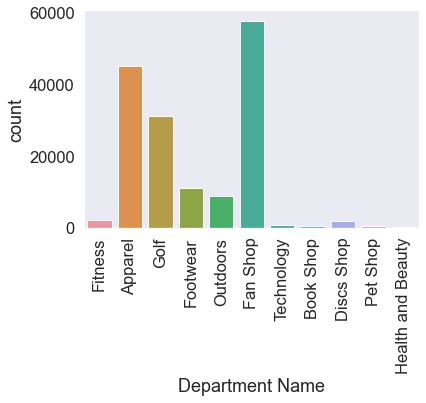

In [30]:
ax = sns.countplot(x="Department Name", data=df)
plt.xticks(rotation=90)
plt.show()

### Market

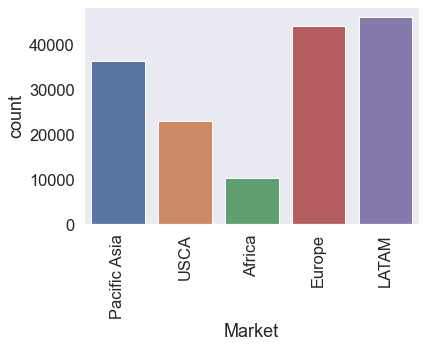

In [31]:
ax = sns.countplot(x="Market", data=df)
plt.xticks(rotation=90)
plt.show()

### Order City

In [32]:
df = df.drop("Order City", axis = 1)

### Order Country

In [33]:
df_country = pd.read_csv("Income by Country.csv")
df_country

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,2193,1841,1739,1208,877,1244,1130,1039,967,...,1498,1675,1625,1776,1814,1796,1783,1766,1767,1746
1,Albania,4415,3138,2857,3261,3600,4168,4594,4112,4530,...,9376,9828,10210,10293,10669,10797,11098,11534,11831,12300
2,Algeria,9989,9457,9462,9171,8847,8904,9069,9099,9502,...,12602,12946,12908,12910,12946,13169,13330,13832,13656,13639
3,Andorra,49062,48391,47002,44928,44747,45136,46861,51136,52922,...,45492,43061,41402,41386,42376,44197,45260,46553,47550,48641
4,Angola,4139,4528,1737,1704,1304,2858,2826,3335,3269,...,5863,5818,5796,6128,6294,6484,6440,6051,5950,5555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela,14529,15667,15945,15666,14919,15290,14943,15524,15322,...,17417,16783,16882,17532,17459,17111,15101,12570,10670,9070
184,Viet Nam,1369,1436,1559,1645,1781,1944,2084,2217,2315,...,3705,4266,4461,4655,4843,5052,5314,5638,5916,6220
185,Yemen,2382,2423,2258,2237,2112,1796,2364,2760,3447,...,4490,3688,3876,3365,3351,3296,2668,1966,1508,1433
186,Zambia,2140,2020,1969,2101,1900,1909,1988,2006,1935,...,3031,3114,3251,3520,3482,3615,3617,3622,3553,3582


In [34]:
for col in df_country:
    if col != "Country":
        if col != "2018":
            df_country = df_country.drop([col], axis = 1)

In [35]:
print((df_country["2018"].mean()))

18468.218085106382


In [36]:
df_country["2018"].quantile(0.25)

4033.25

In [37]:
lower = df_country["2018"].quantile(0.25)
mid = df_country["2018"].quantile(0.5)
high = df_country["2018"].quantile(0.75)

In [38]:
def income(x):
    if x<lower:
        return 0
    elif x>lower and x<=mid:
        return 1
    elif x>mid and x<=high:
        return 2
    elif x>high:
        return 3

df_country['income_grp'] = df_country["2018"].map(income)
df_country

,Country,2018,income_grp
0,Afghanistan,1746,0
1,Albania,12300,2
2,Algeria,13639,2
3,Andorra,48641,3
4,Angola,5555,1
...,...,...,...
183,Venezuela,9070,1
184,Viet Nam,6220,1
185,Yemen,1433,0
186,Zambia,3582,0


In [39]:
type(list(df_country["income_grp"].loc[df_country["Country"]=="India"])[0])

int

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160363 entries, 0 to 180516
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           160363 non-null  object 
 1   Days for shipping (real)       160363 non-null  int64  
 2   Days for shipment (scheduled)  160363 non-null  int64  
 3   Benefit per order              160363 non-null  float64
 4   Sales per customer             160363 non-null  float64
 5   Delivery Status                160363 non-null  object 
 6   Late_delivery_risk             160363 non-null  int64  
 7   Category Id                    160363 non-null  int64  
 8   Category Name                  160363 non-null  object 
 9   Customer City                  160363 non-null  object 
 10  Customer Country               160363 non-null  object 
 11  Customer Id                    160363 non-null  int64  
 12  Customer Segment              

In [41]:
def country_grp(x):
    y = list(df_country["income_grp"].loc[df_country["Country"]==x])
    if y == [0]:
        return 0
    elif y == [1]:
        return 1
    elif y == [2]:
        return 2
    elif y == [3]:
        return 3
    else:
        return 4


In [42]:
df["Country_grp"] = df["Order Country"].map(country_grp)
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Order Country,Delay,Country_grp
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class,Indonesia,1,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,Australia,1,3
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,Australia,2,3
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/19/2018 11:03,Standard Class,Australia,-2,3
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 10:42,First Class,China,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180509,PAYMENT,3,4,0.000000,335.980011,Advance shipping,0,45,Fishing,Caguas,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 6:49,Standard Class,China,1,2
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class,China,-2,2
180513,PAYMENT,3,4,119.989998,299.989990,Advance shipping,0,45,Fishing,Lancaster,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 5:04,Standard Class,China,1,2
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,China,0,2


### Order Customer Id
### order date (DateOrders) 
###  Order Id

In [43]:
df = df.drop(["Order Customer Id","order date (DateOrders)","Order Id"], axis = 1)

### Order Item Cardprod Id

In [44]:
df["Order Item Cardprod Id"].unique()

array([1360,  365,  502,  627,  278,  249,  917,  828,  191,  642,  818,
        825,  306,  977,   44,  251,  403,  957, 1352, 1349,   24,  567,
        893,  924,  905,  564,  885, 1363, 1353, 1357,  906,  886,  926,
        116,  235,  273,  282,  565,  572,  804,  822,  835,  276,  823,
        203,  364, 1350,  897,   37,  172,  810,  821,   93, 1347,  305,
       1004, 1346,   58,  311,  303, 1354, 1348,  359,  258,  797,  981,
        135,  134,  845,  982,  625, 1359, 1356,  607, 1355, 1358, 1362,
        295,  127,   61,   35,  858,   78,  216,   19,  793,  792,  786,
        778,  777,  775,  773,  771,  768,  743,  730,  728,  725,  724,
        715,  705,  703,  691,  677,  671,  666,  652,  647,  646, 1361,
       1073, 1059, 1014], dtype=int64)

### Order Item Discount         
### Order Item Discount Rate    
### Order Item Id               
### Order Item Product Price    
### Order Item Profit Ratio     
### Order Item Quantity         
### Sales                       
### Order Item Total            
###  Order Profit Per Order 

<function matplotlib.pyplot.show(close=None, block=None)>

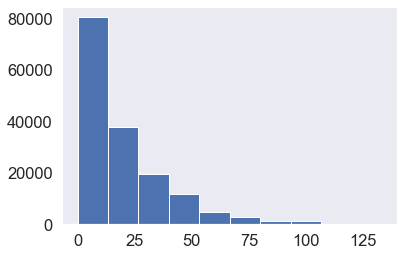

In [45]:
plt.hist(df["Order Item Discount"],bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

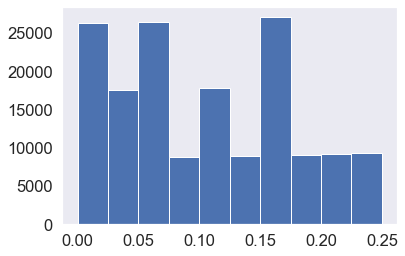

In [46]:
plt.hist(df["Order Item Discount Rate"],bins=10)
plt.show

In [47]:
df["Order Item Id"].unique()

array([180517, 179252, 179251, ...,  65185,  65177,  65129], dtype=int64)

In [48]:
df = df.drop("Order Item Id", axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

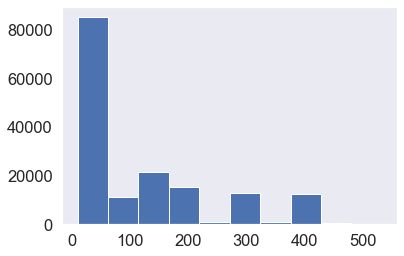

In [49]:
plt.hist(df["Order Item Product Price"],bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

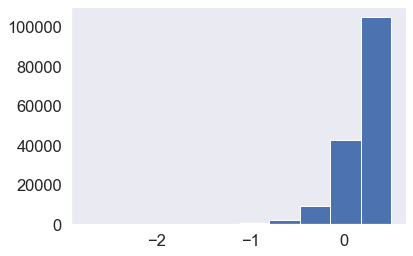

In [50]:
plt.hist(df["Order Item Profit Ratio"],bins=10)
plt.show

In [51]:
Q1 = df["Order Item Profit Ratio"].quantile(0.25)
Q3 = df["Order Item Profit Ratio"].quantile(0.75)



IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR

ls = df.index[(df["Order Item Profit Ratio"]< lower) ]

ls2 = df.index[(df["Order Item Profit Ratio"] > upper)]
ind_lis = []
ind_lis.extend(ls)
ind_lis.extend(ls2)


''' Removing the Outliers '''
df = df.drop(ind_lis)
print("new Shape: ", df.shape)

Old Shape:  (160363, 42)
new Shape:  (155524, 42)


<function matplotlib.pyplot.show(close=None, block=None)>

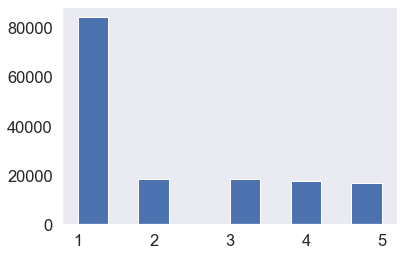

In [52]:
plt.hist(df["Order Item Quantity"],bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

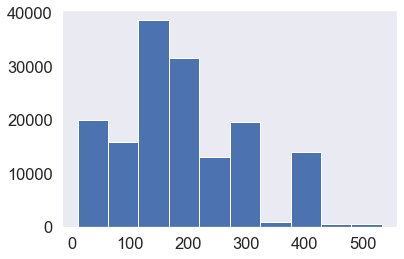

In [53]:
plt.hist(df["Sales"],bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

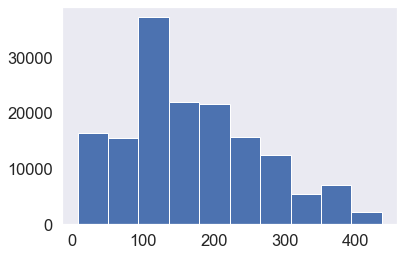

In [54]:
plt.hist(df["Order Item Total"],bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

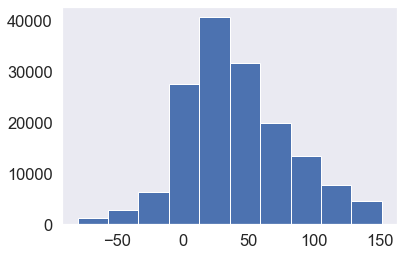

In [55]:
plt.hist(df["Order Profit Per Order"],bins=10)
plt.show

### Order Region
### Order State                    
### Order Status                   
### Product Card Id                
### Product Category Id            
### Product Image                  
### Product Name                   
### Product Price                  
### Product Status                 
### shipping date (DateOrders)     
###  Shipping Mode

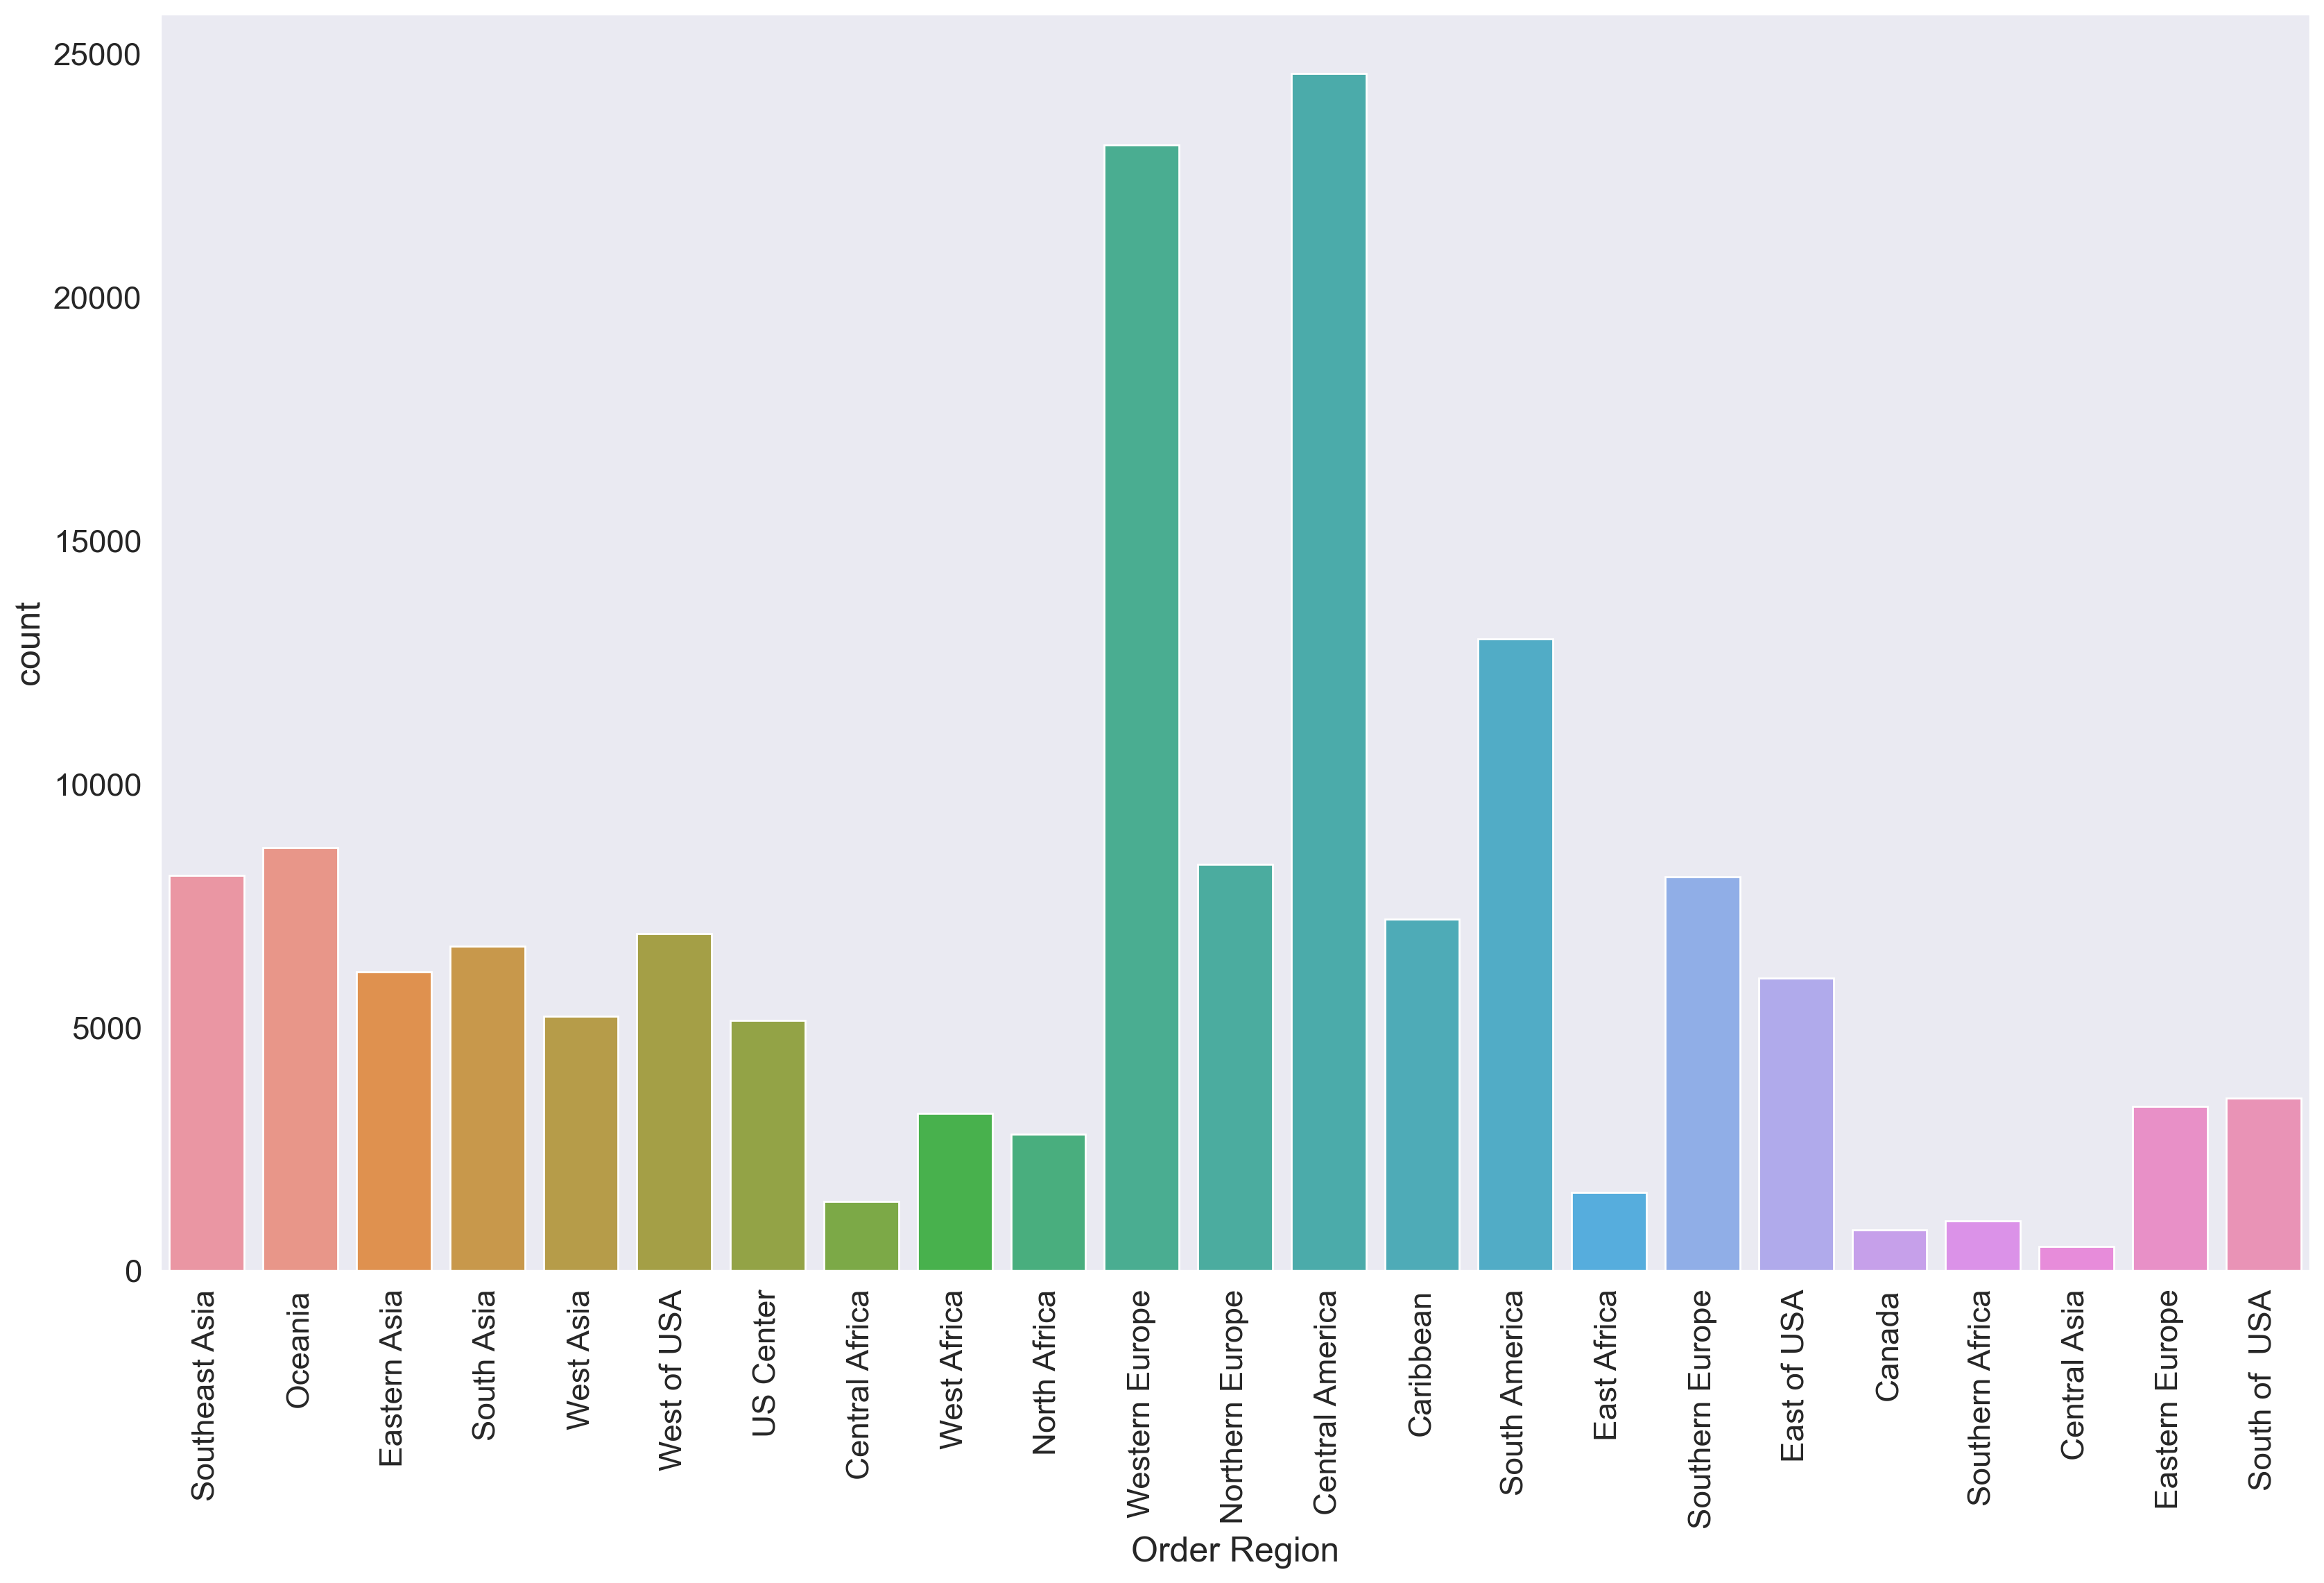

In [56]:
plt.figure(figsize=(20,12), dpi= 200)
ax = sns.countplot(x="Order Region", data=df)
plt.xticks(rotation=90)
plt.show()

In [57]:
len(df["Order State"].unique())

1086

In [58]:
df = df.drop("Order State", axis = 1)

In [59]:
df["Order Status"].unique()

array(['COMPLETE', 'PENDING_PAYMENT', 'CANCELED', 'PROCESSING', 'CLOSED',
       'SUSPECTED_FRAUD', 'PENDING', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

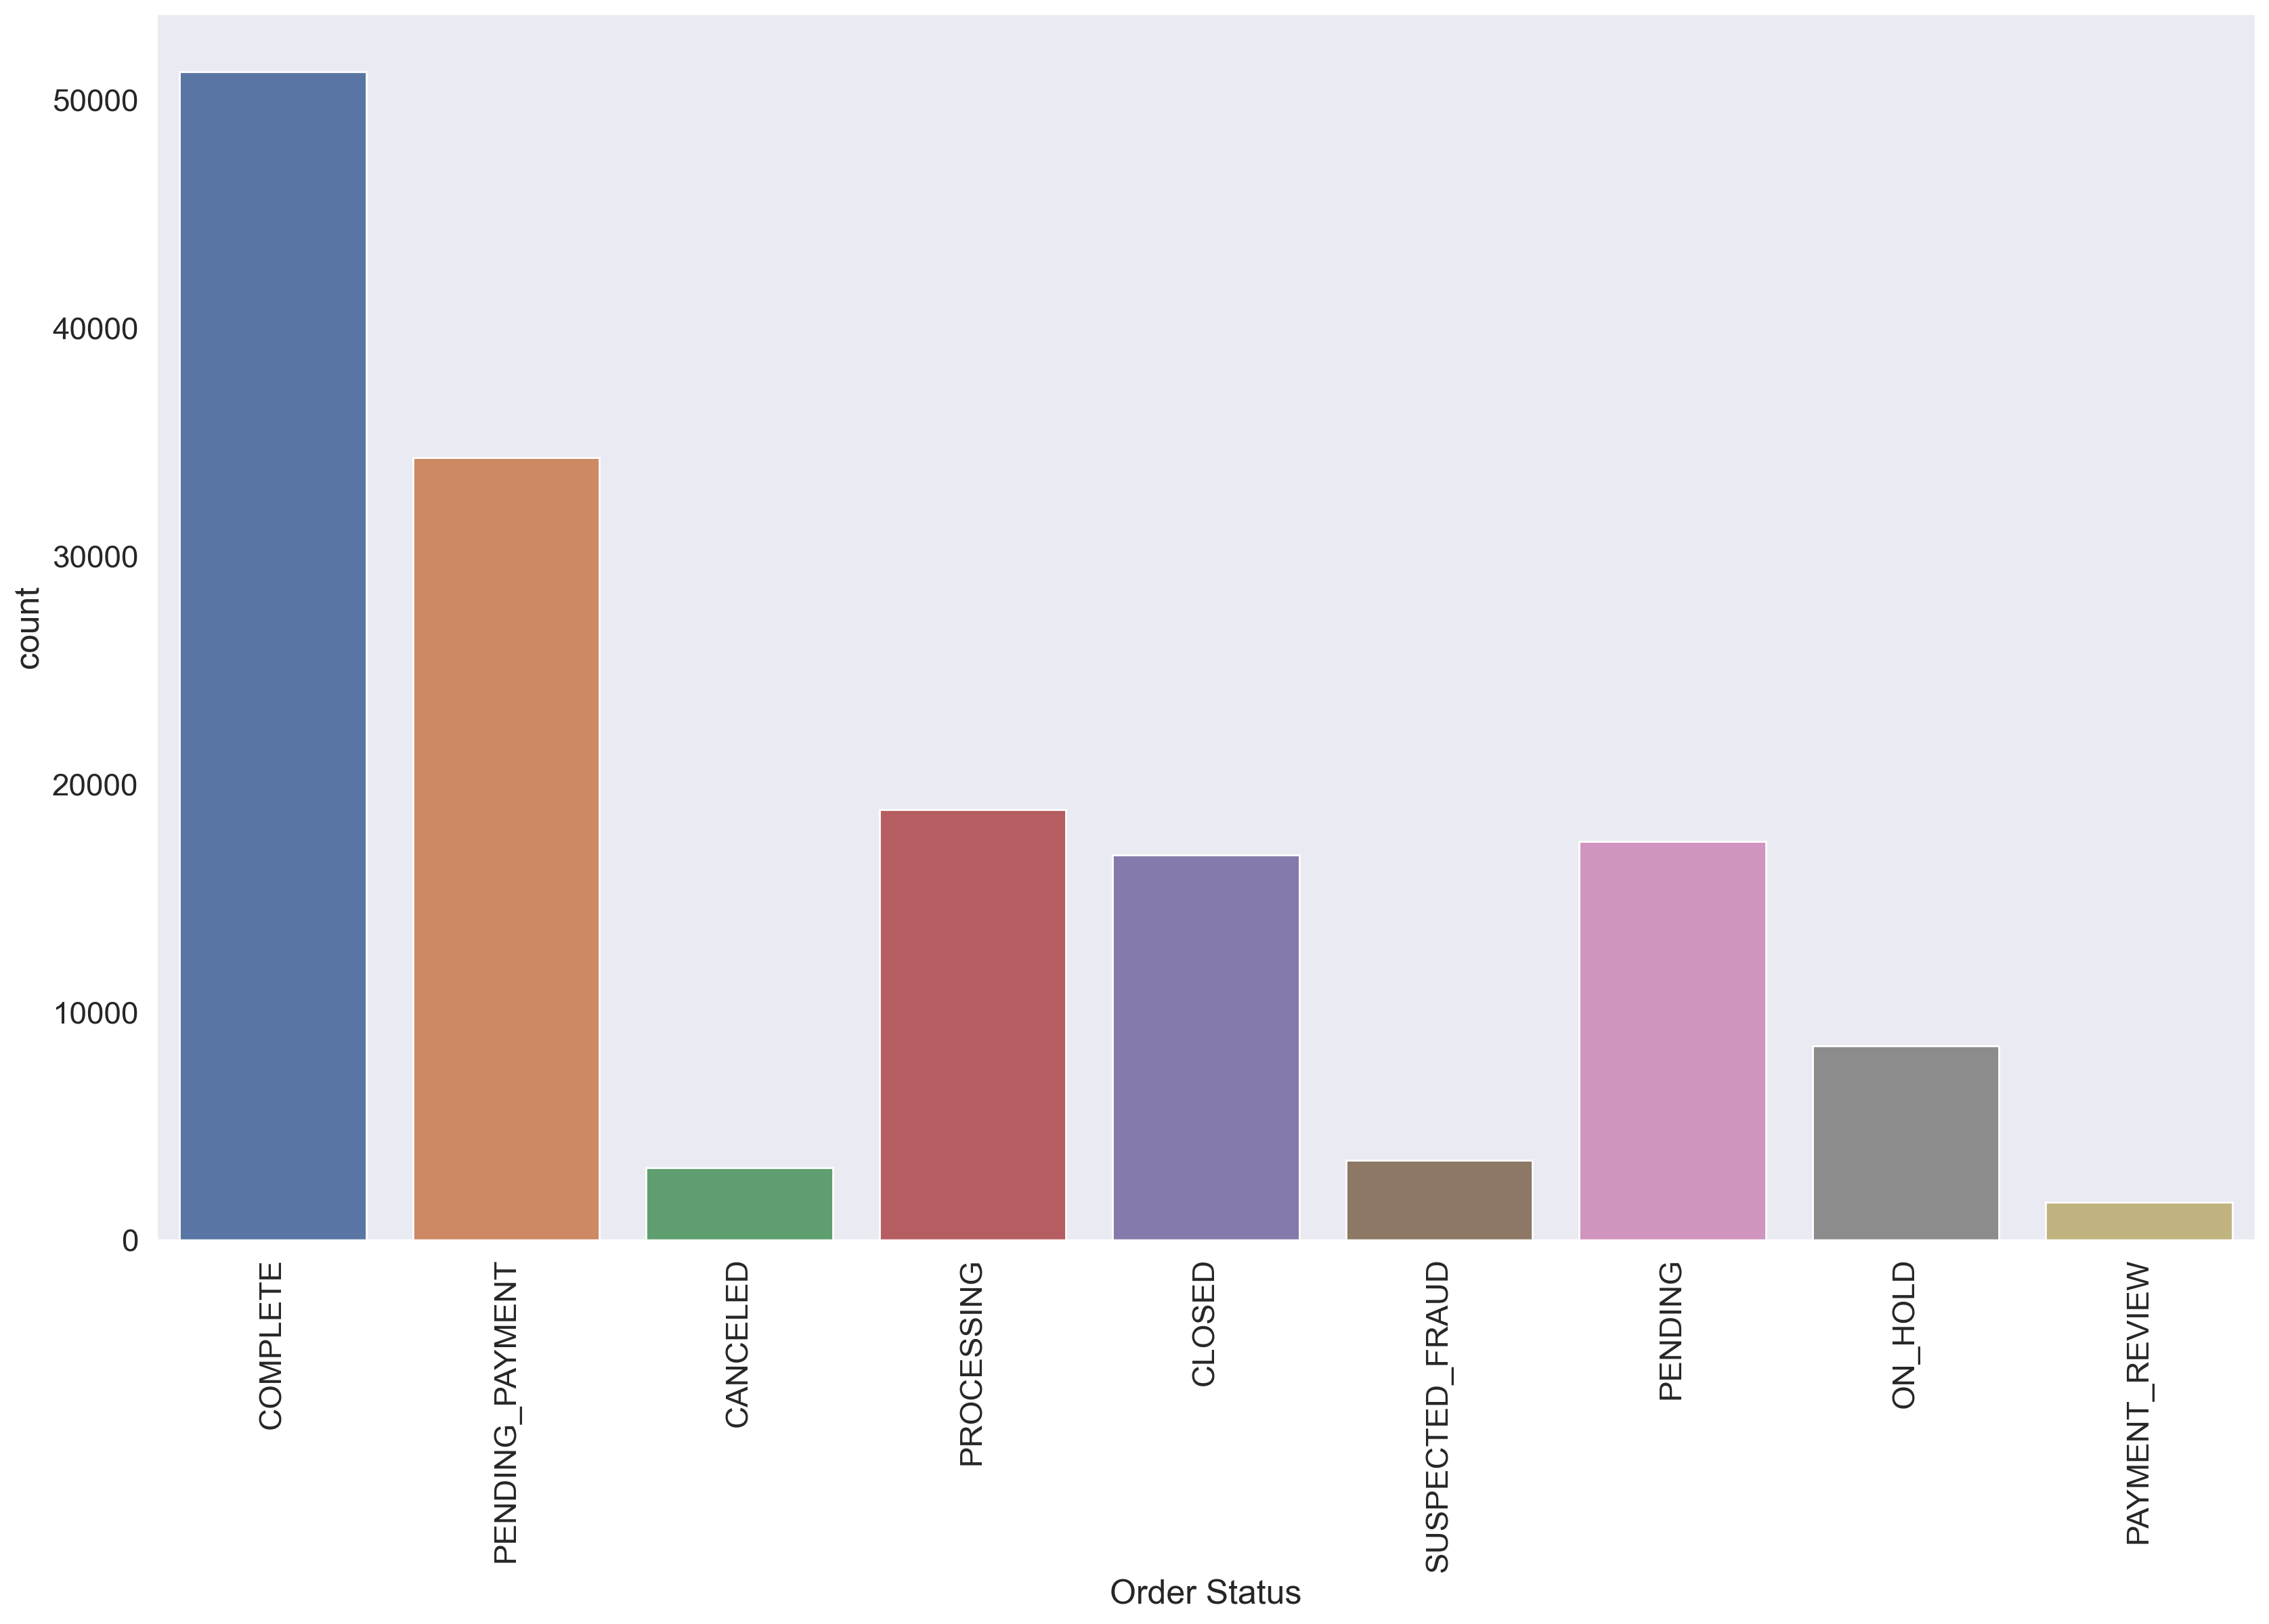

In [60]:
plt.figure(figsize=(20,12), dpi= 200)
ax = sns.countplot(x="Order Status", data=df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df["Order Status"] = df["Order Status"].replace(['PENDING_PAYMENT','PROCESSING'], "PENDING")
df["Order Status"] = df["Order Status"].replace(['CLOSED'], "CANCELED")
df["Order Status"] = df["Order Status"].replace(['ON_HOLD'], "PAYMENT_REVIEW")

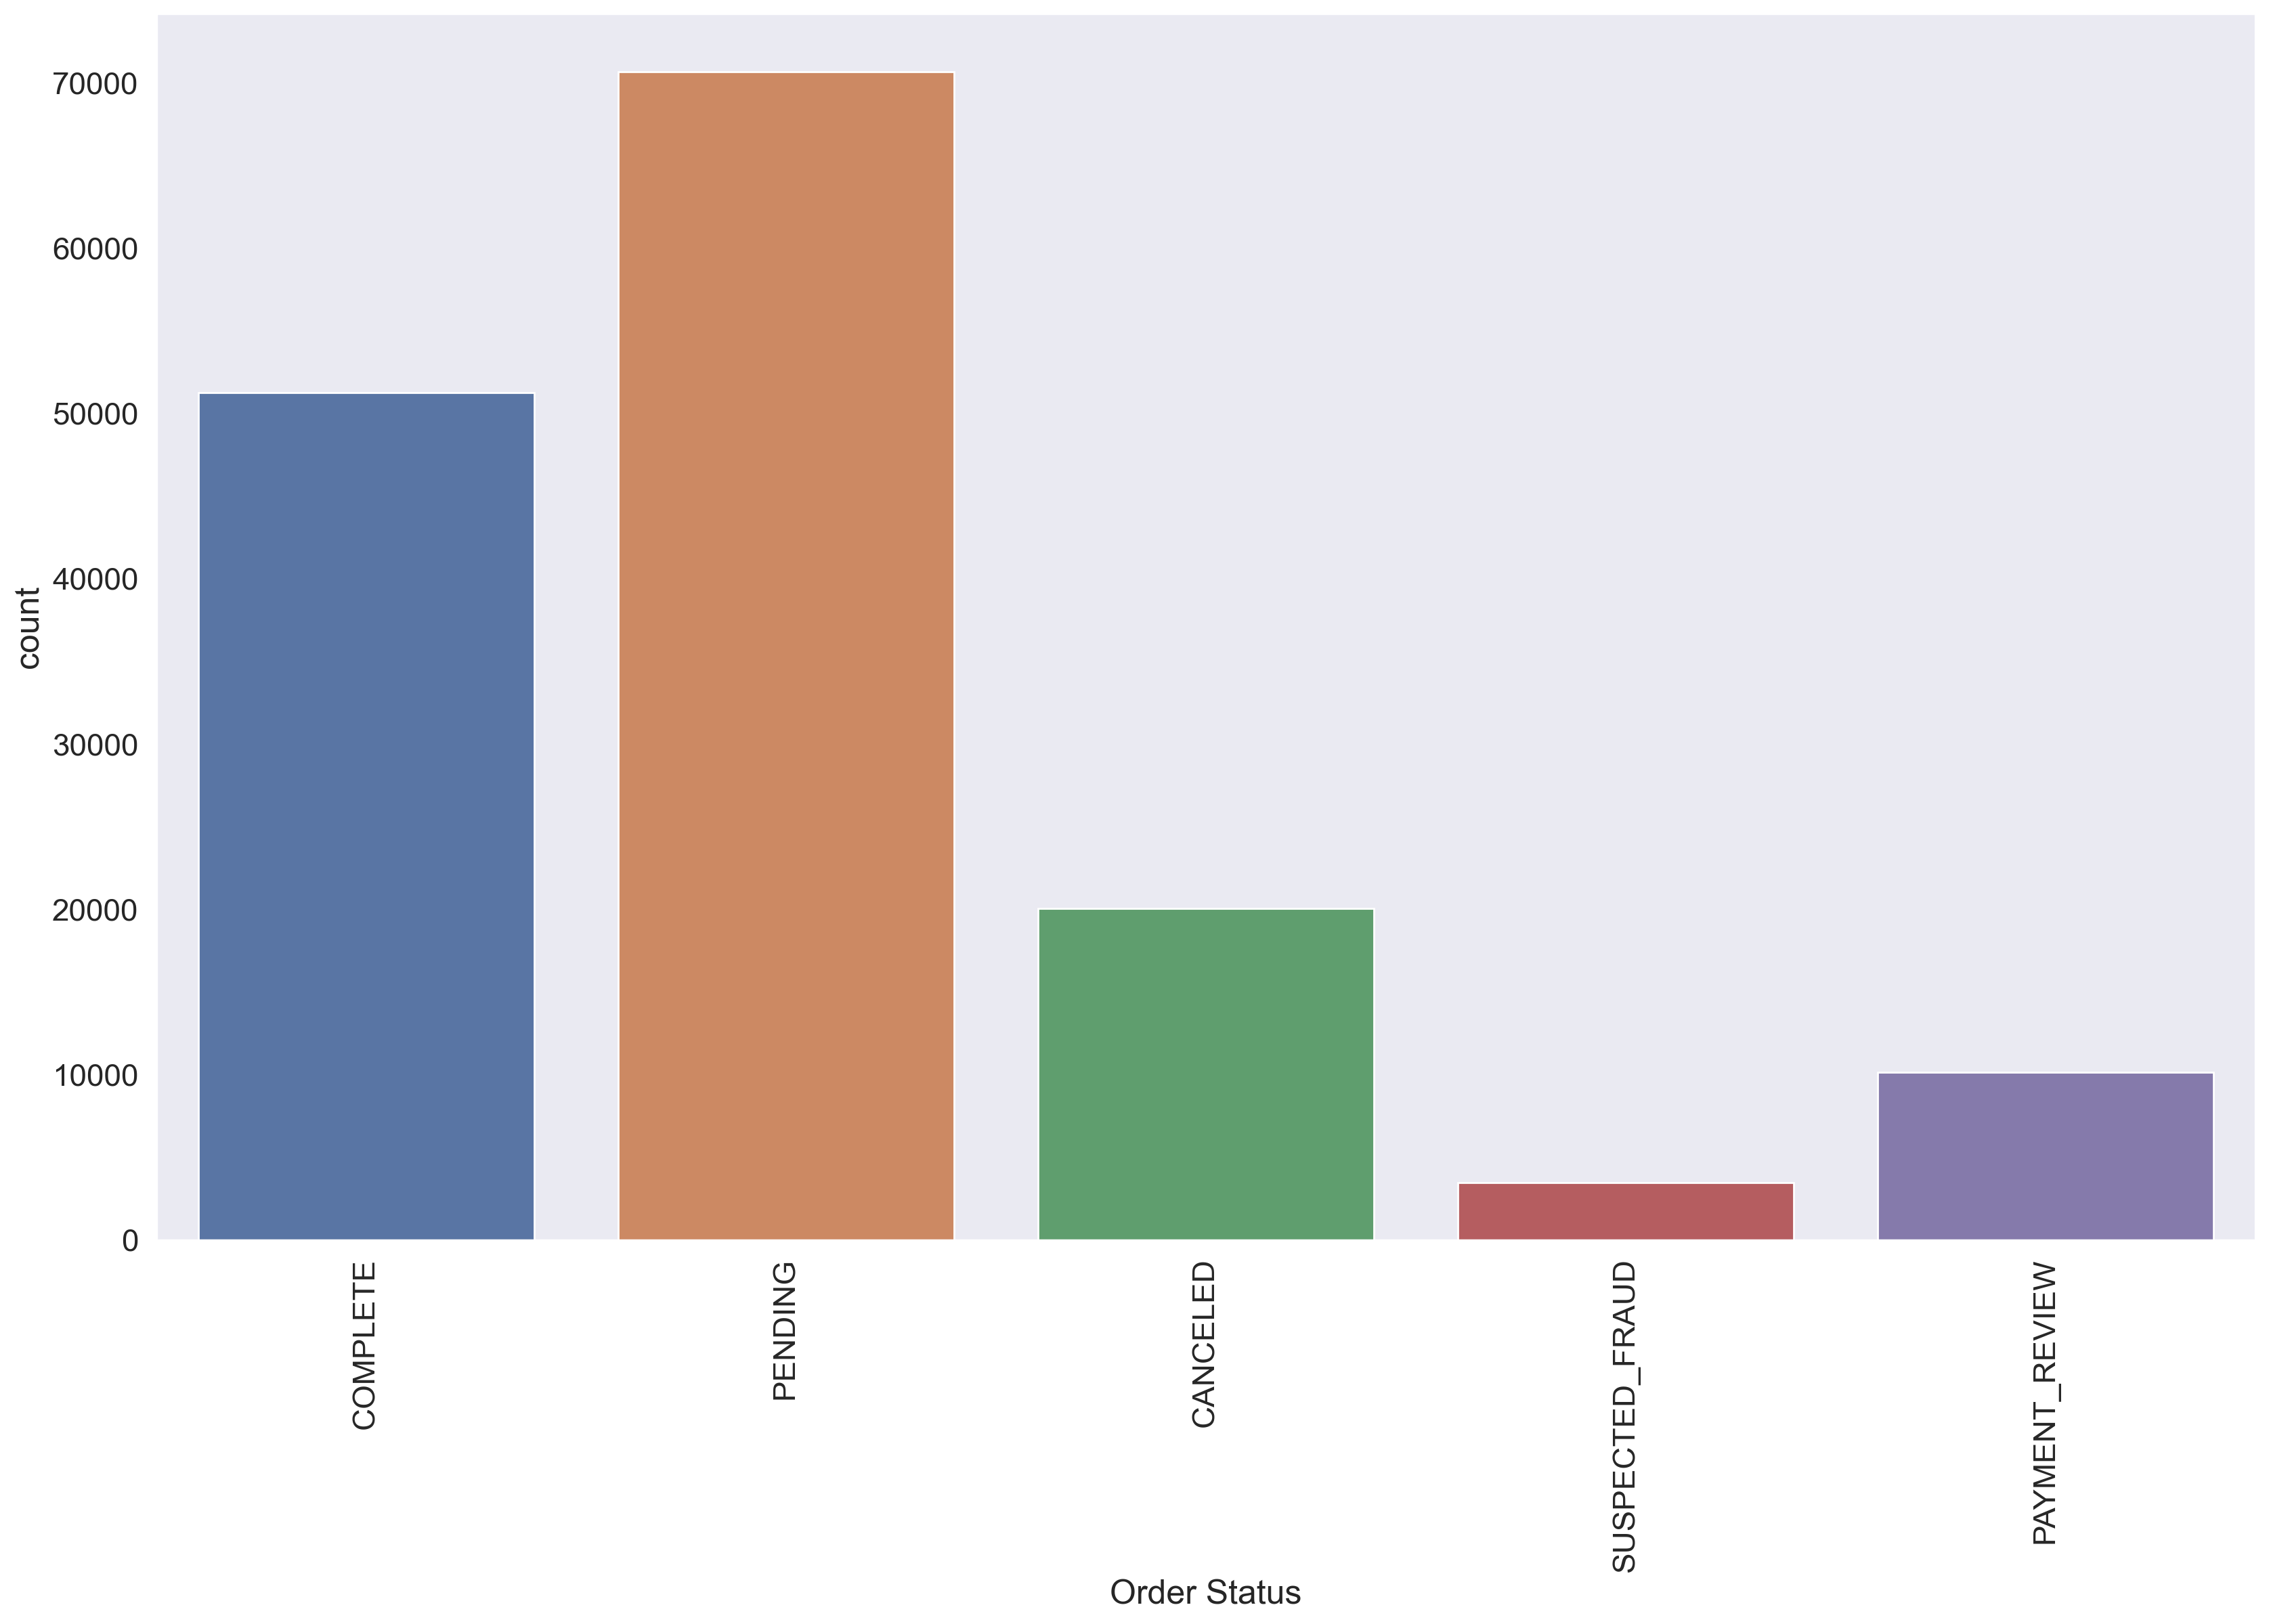

In [62]:
plt.figure(figsize=(20,12), dpi= 200)
ax = sns.countplot(x="Order Status", data=df)
plt.xticks(rotation=90)
plt.show()

In [63]:
df["Product Card Id"].unique()

array([1360,  365,  502,  627,  278,  249,  917,  828,  191,  642,  818,
        825,  306,  977,   44,  251,  403,  957, 1352, 1349,   24,  567,
        893,  924,  905,  564,  885, 1363, 1353, 1357,  906,  886,  926,
        116,  235,  273,  282,  565,  572,  804,  822,  835,  276,  823,
        203,  364, 1350,  897,   37,  172,  810,  821,   93, 1347,  305,
       1004, 1346,   58,  311,  303, 1354, 1348,  359,  258,  797,  981,
        135,  134,  845,  982,  625, 1359, 1356,  607, 1355, 1358, 1362,
        295,  127,   61,   35,  858,   78,  216,   19,  793,  792,  786,
        778,  777,  775,  773,  771,  768,  743,  730,  728,  725,  724,
        715,  705,  703,  691,  677,  671,  666,  652,  647,  646, 1361,
       1073, 1059, 1014], dtype=int64)

In [64]:
df["Product Category Id"].unique()

array([73, 17, 24, 29, 13, 12, 41, 37,  9, 38, 44,  3, 18, 43, 65, 62,  2,
       26, 40, 76, 66, 70,  6, 11, 36, 10, 63,  5, 60, 45, 59,  4, 67, 61,
       16,  7, 72, 69, 68, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

In [65]:
df = df.drop("Product Image", axis = 1)

In [66]:
len(df["Product Name"].unique())

113

<function matplotlib.pyplot.show(close=None, block=None)>

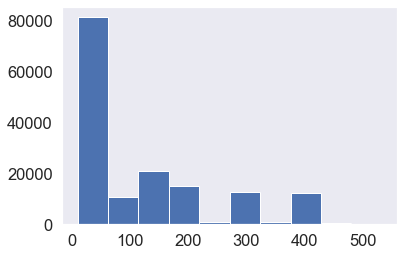

In [67]:
plt.hist(df["Product Price"],bins=10)
plt.show

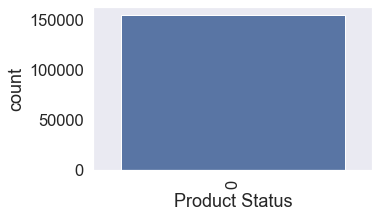

In [68]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x="Product Status", data=df)
plt.xticks(rotation=90)
plt.show()

In [69]:
df = df.drop("Product Status", axis = 1)

In [70]:
df = df.drop("shipping date (DateOrders)", axis = 1)

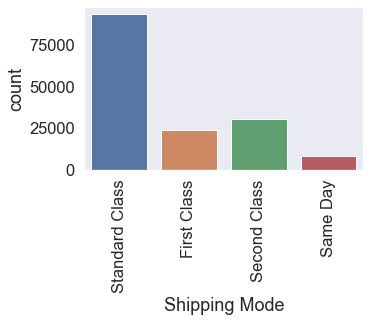

In [71]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x="Shipping Mode", data=df)
plt.xticks(rotation=90)
plt.show()

In [72]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Order Country,Delay,Country_grp
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,COMPLETE,1360,73,Smart watch,327.750000,Standard Class,Indonesia,1,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,COMPLETE,1360,73,Smart watch,327.750000,Standard Class,Australia,1,3
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,PENDING,1360,73,Smart watch,327.750000,Standard Class,Australia,2,3
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,Oceania,CANCELED,1360,73,Smart watch,327.750000,Standard Class,Australia,-2,3
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,Eastern Asia,COMPLETE,1360,73,Smart watch,327.750000,First Class,China,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180509,PAYMENT,3,4,0.000000,335.980011,Advance shipping,0,45,Fishing,Caguas,...,Eastern Asia,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,China,1,2
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,Eastern Asia,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,China,-2,2
180513,PAYMENT,3,4,119.989998,299.989990,Advance shipping,0,45,Fishing,Lancaster,...,Eastern Asia,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,China,1,2
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Eastern Asia,CANCELED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,China,0,2


# Predict Payment Status

## Data Analysis

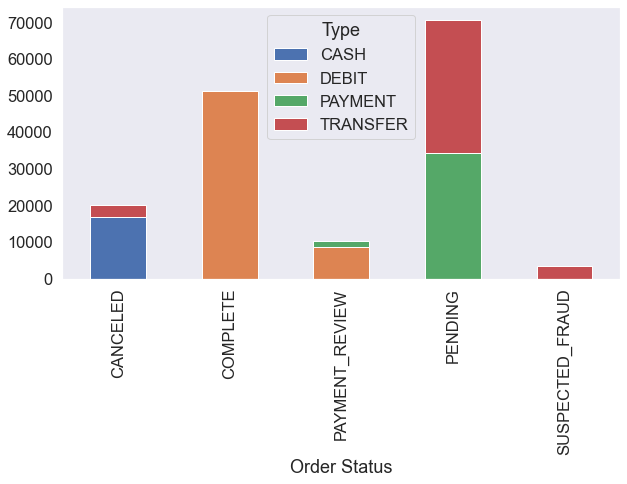

In [73]:
pd.crosstab(df["Order Status"],df.Type).plot(figsize=(10,5),kind='bar',stacked=True)
plt.show()

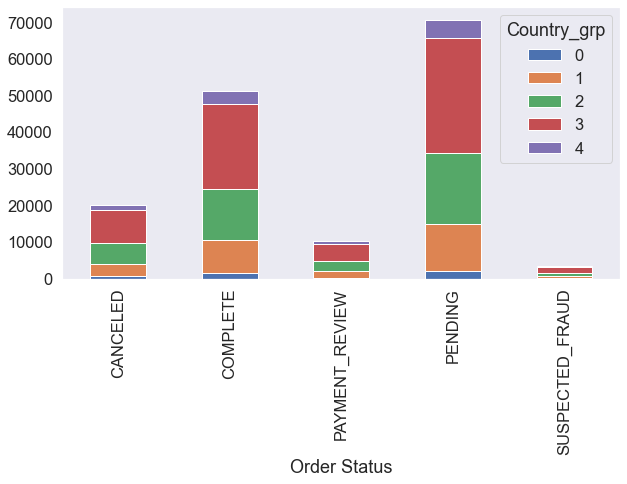

In [74]:
pd.crosstab(df["Order Status"], df["Country_grp"]).plot(figsize=(10,5),kind='bar',stacked=True)
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155524 entries, 0 to 180516
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           155524 non-null  object 
 1   Days for shipping (real)       155524 non-null  int64  
 2   Days for shipment (scheduled)  155524 non-null  int64  
 3   Benefit per order              155524 non-null  float64
 4   Sales per customer             155524 non-null  float64
 5   Delivery Status                155524 non-null  object 
 6   Late_delivery_risk             155524 non-null  int64  
 7   Category Id                    155524 non-null  int64  
 8   Category Name                  155524 non-null  object 
 9   Customer City                  155524 non-null  object 
 10  Customer Country               155524 non-null  object 
 11  Customer Id                    155524 non-null  int64  
 12  Customer Segment              

(-171.69043912561798, 128.92753022561797, 16.480732255, 50.308587745000004)

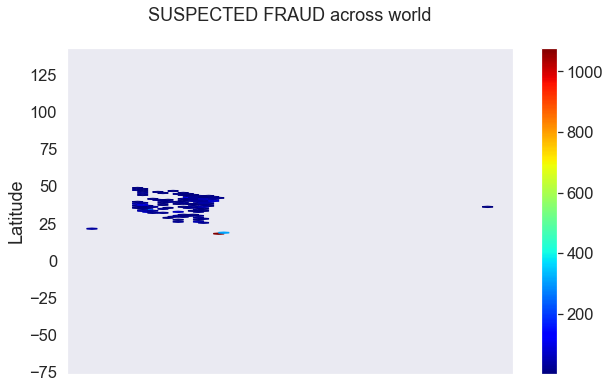

In [76]:
df_perfect_Air = df[df['Order Status'] == 'SUSPECTED_FRAUD']
df_perfect_Air.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'SUSPECTED FRAUD across world\n', figsize=(10,6)).axis('equal')

(-171.69043912561798, 128.92753022561797, -38.073527722, 52.917907142000004)

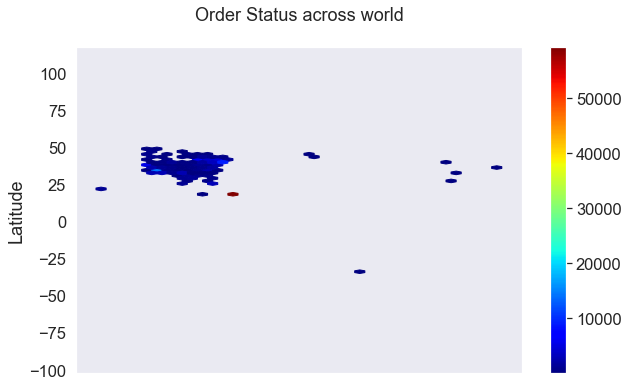

In [77]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Order Status across world\n', figsize=(10,6)).axis('equal')

### Deleting  the Columns that we not suppose to know

In [182]:
df_1 = df.drop(["Days for shipping (real)","Delivery Status","Late_delivery_risk","Delay"], axis = 1)

In [183]:
X = df_1.drop("Order Status", axis = 1)
y = df_1["Order Status"]

In [184]:
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col]=le.fit_transform(X[col])

In [185]:
y.unique()

array(['COMPLETE', 'PENDING', 'CANCELED', 'SUSPECTED_FRAUD',
       'PAYMENT_REVIEW'], dtype=object)

In [186]:
y = y.map({'COMPLETE': 0, 'PENDING': 1,'CANCELED': 2, 'SUSPECTED_FRAUD': 3,'PAYMENT_REVIEW': 4})

In [187]:
y.value_counts()

1    70644
0    51224
2    20035
4    10142
3     3479
Name: Order Status, dtype: int64

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2022)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.75, random_state=2022)

In [189]:
x_test

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Item Total,Order Profit Per Order,Order Region,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Order Country,Country_grp
46312,2,4,14.530000,41.500000,24,46,23,0,10291,1,...,41.500000,14.530000,13,502,24,56,50.000000,3,65,1
174225,0,4,7.500000,299.980011,43,9,65,1,3889,0,...,299.980011,7.500000,14,957,43,18,299.980011,3,151,3
100687,2,1,8.400000,83.970001,46,29,65,1,9055,2,...,83.970001,8.400000,21,1014,46,64,49.980000,0,151,3
58671,2,1,34.119999,97.489998,18,33,65,1,8591,0,...,97.489998,34.119999,3,403,18,53,129.990005,0,92,2
48987,1,2,24.900000,248.979996,43,9,290,0,3148,1,...,248.979996,24.900000,11,957,43,18,299.980011,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56551,1,4,55.549999,113.370003,13,16,65,1,11889,0,...,113.370003,55.549999,12,278,13,100,44.990002,3,4,2
175984,1,1,7.920000,105.580002,17,12,65,1,7765,0,...,105.580002,7.920000,7,365,17,68,59.990002,0,31,2
19108,2,1,7.920000,90.000000,24,46,336,0,8200,0,...,90.000000,7.920000,22,502,24,56,50.000000,0,48,3
86574,3,4,16.870001,224.990005,43,9,206,0,2705,1,...,224.990005,16.870001,20,957,43,18,299.980011,3,75,1


In [190]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [220]:
rf_model = RandomForestClassifier()

In [226]:
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight': ["balanced",None]
}
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [227]:
CV_rfc.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [242]:
rf_tuned = RandomForestClassifier(class_weight= None, criterion = "gini",
                                  max_depth = 8,max_features = "auto", n_estimators = 500)

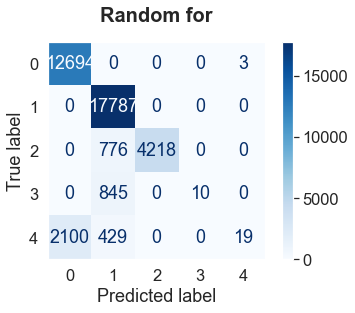

,Model,Accuracy
0,Random For,0.893187


In [243]:
y_pred = rf_model.predict(x_test)

results_df = pd.DataFrame(
    data=[["Random For", accuracy_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy'])

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random for", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()
results_df

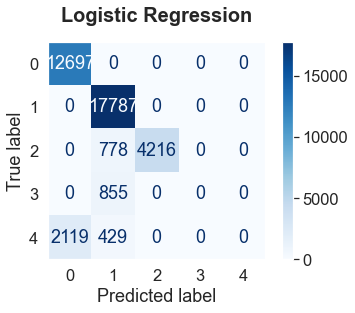

,Model,Accuracy
0,Logistic Regression,0.892467


In [197]:
Lr_model = LogisticRegression(max_iter=1000)
Lr_model.fit(x_train,y_train)

y_pred = Lr_model.predict(x_test)

results_df = pd.DataFrame(
    data=[["Logistic Regression", accuracy_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy'])

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

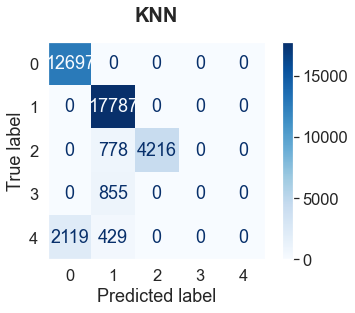

,Model,Accuracy
0,KNN,0.892467


In [245]:
knn_model = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn_model.fit(x_train,y_train)

y_pred = Lr_model.predict(x_test)

results_df = pd.DataFrame(
    data=[["KNN", accuracy_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy'])

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

In [ ]:
|